# 1. FFT pada sinyal yang diberikan

Pertama-tama, lakukan plot untuk sinyal asli berdasarkan sinyal yang diberikan.

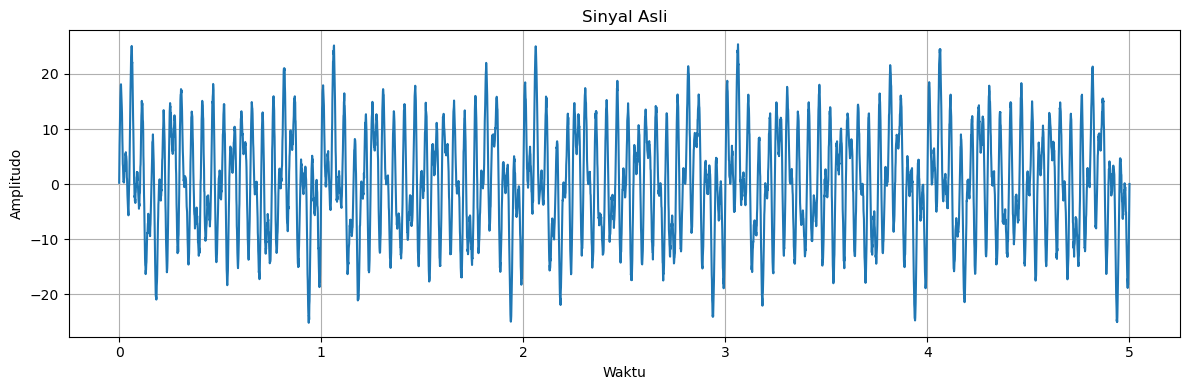

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dari CSV
df = pd.read_csv('signal_122140098.csv')

# Tentukan kolom waktu dan kolom sinyal
time = df.iloc[:, 0]
signal = df.iloc[:, 1]

# Plot sinyal asli
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.title('Sinyal Asli')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.tight_layout()
plt.show()

Kemudian kita lakukan fft pada sinyal tersebut.

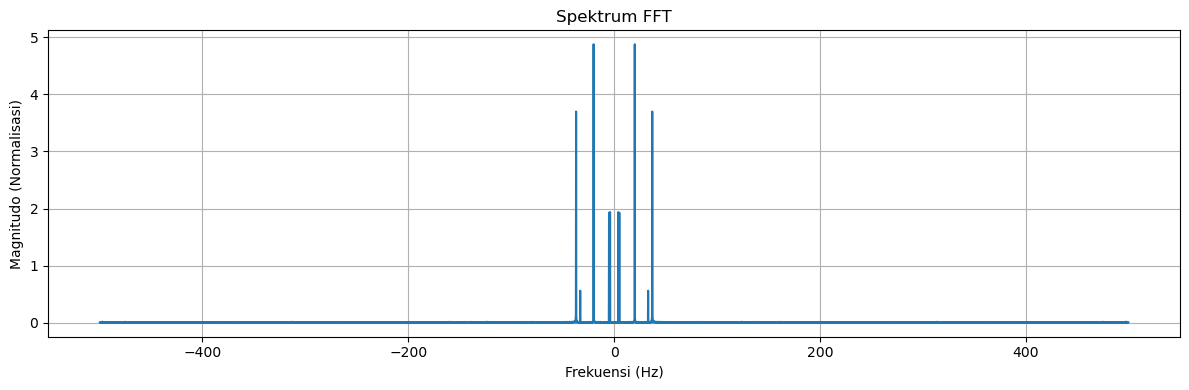

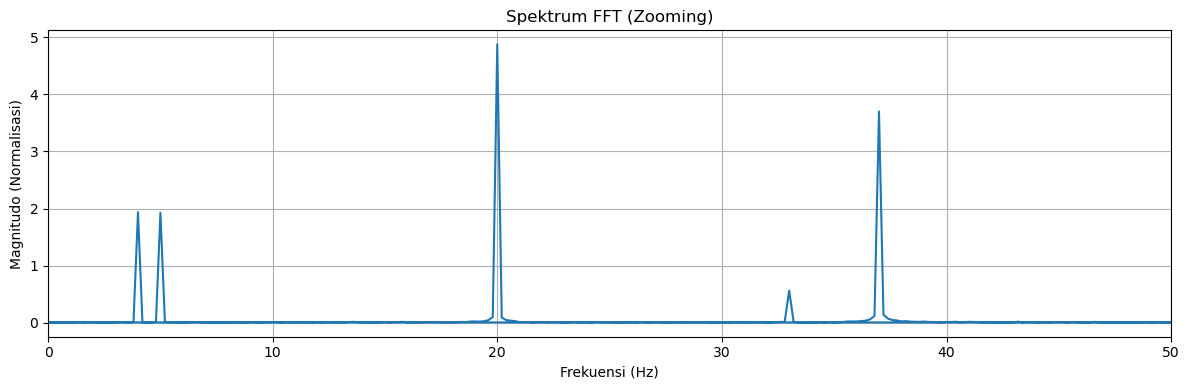

Sinyal dominan (frekuensi dan magnitudo):
Frekuensi: 20.00 Hz, Magnitudo: 4.8778
Frekuensi: -20.00 Hz, Magnitudo: 4.8778
Frekuensi: 36.99 Hz, Magnitudo: 3.7001
Frekuensi: -36.99 Hz, Magnitudo: 3.7001
Frekuensi: -4.00 Hz, Magnitudo: 1.9373
Frekuensi: 4.00 Hz, Magnitudo: 1.9373
Frekuensi: 5.00 Hz, Magnitudo: 1.9284
Frekuensi: -5.00 Hz, Magnitudo: 1.9284
Frekuensi: 32.99 Hz, Magnitudo: 0.5627
Frekuensi: -32.99 Hz, Magnitudo: 0.5627


In [57]:
import numpy as np

# Lakukan FFT pada sinyal
fft_result = np.fft.fft(signal)
fft_magnitude = np.abs(fft_result) / len(signal)  # Normalisasi FFT magnitude
frequencies = np.fft.fftfreq(len(signal), d=timestep)

# Plot grafik FFT
plt.figure(figsize=(12, 4))
plt.plot(frequencies, fft_magnitude)
plt.title('Spektrum FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo (Normalisasi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot grafik FFT (zooming)
plt.figure(figsize=(12, 4))
plt.plot(frequencies, fft_magnitude)
plt.xlim(0, 50)  # Zoom pada rentang frekuensi 0-50 Hz
plt.title('Spektrum FFT (Zooming)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo (Normalisasi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cari indeks sinyal dominan
dominant_indices = np.argsort(fft_magnitude)[-10:][::-1]  # Ambil 10 sinyal dominan
print("Sinyal dominan (frekuensi dan magnitudo):")
for idx in dominant_indices:
  print(f"Frekuensi: {frequencies[idx]:.2f} Hz, Magnitudo: {fft_magnitude[idx]:.4f}")

# 2. Band-Pass Filtering

Untuk penerapan band-pass filtering, saya menggunakan sinyal dominan dengan frekuensi = 20Hz dan magnitude = 4.8778.

In [58]:
from scipy.signal import butter, filtfilt

# Fungsi untuk membuat band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
  nyquist = 0.5 * fs
  low = lowcut / nyquist
  high = highcut / nyquist
  b, a = butter(order, [low, high], btype='band')
  return b, a

# Fungsi untuk menerapkan band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y = filtfilt(b, a, data)
  return y

# Parameter filter
lowcut = 19.5  # Frekuensi bawah (Hz)
highcut = 20.5  # Frekuensi atas (Hz)

# Terapkan band-pass filter pada sinyal
filtered_signal_20hz = bandpass_filter(signal, lowcut, highcut, fs)


Plot sinyal asli dan sinyal hasil filtering untuk membandingkan.

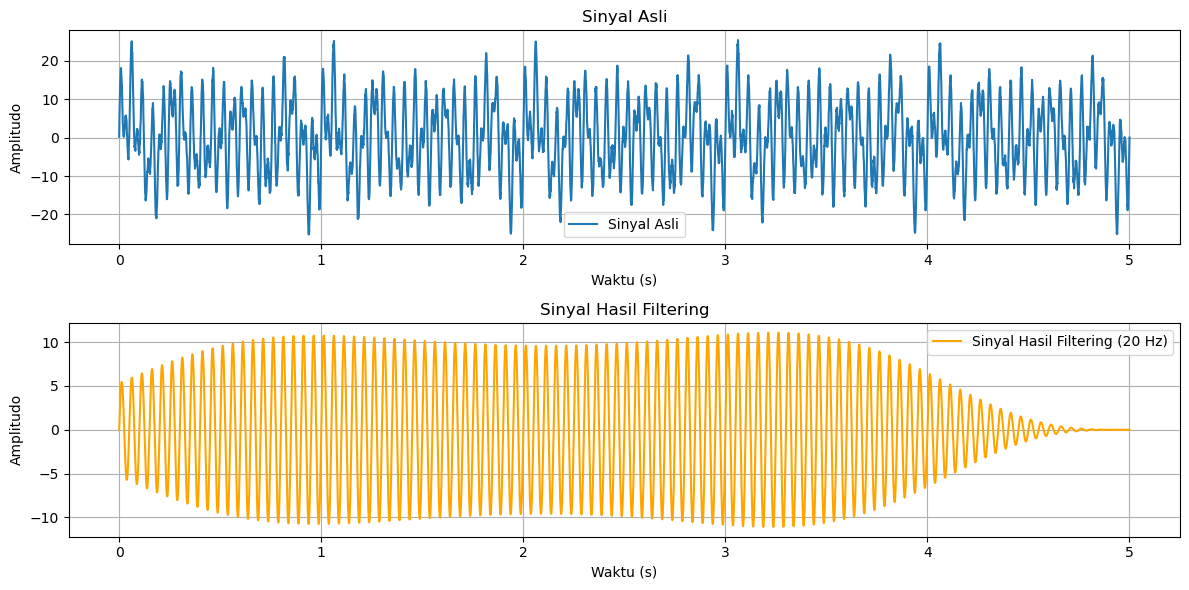

In [61]:
plt.figure(figsize=(12, 6))

# Plot sinyal asli
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Sinyal Asli')
plt.title('Sinyal Asli')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()

# Plot sinyal hasil filtering
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal_20hz, label='Sinyal Hasil Filtering (20 Hz)', color='orange')
plt.title('Sinyal Hasil Filtering')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

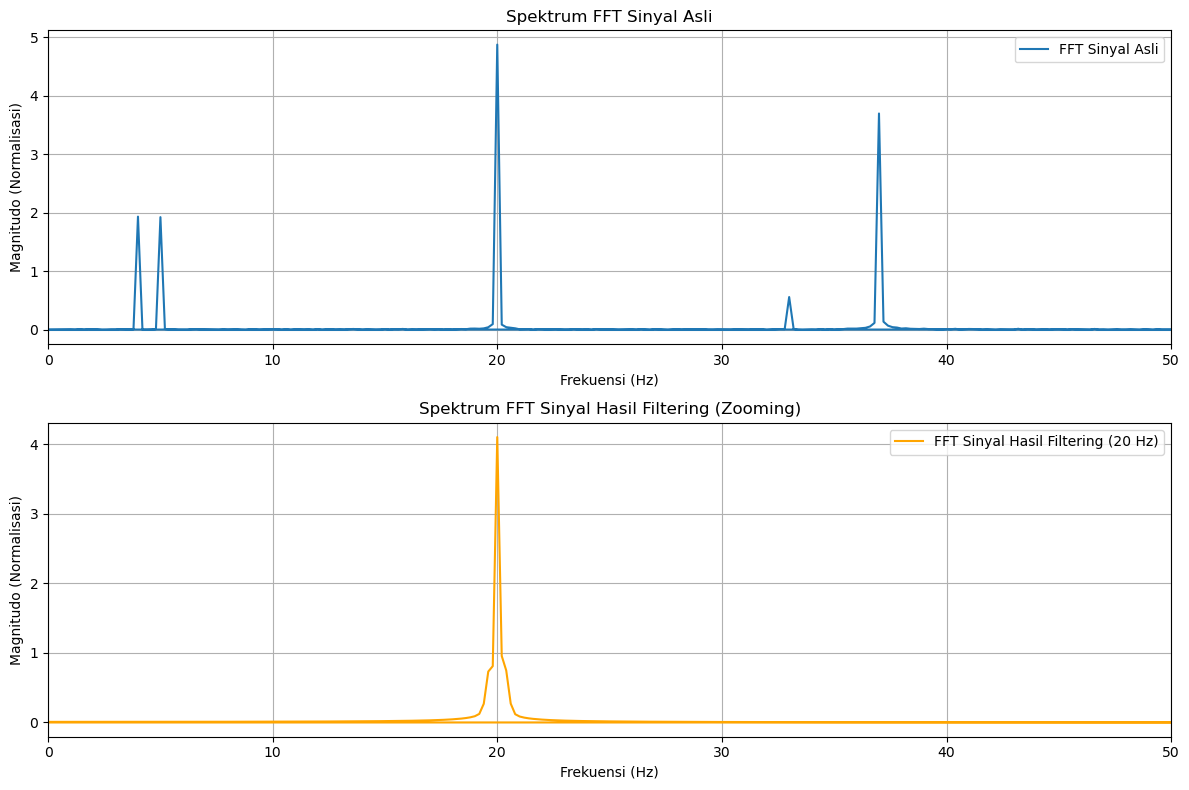

In [ ]:
# Lakukan FFT pada sinyal hasil filtering
fft_filtered = np.fft.fft(filtered_signal_20hz)
fft_filtered_magnitude = np.abs(fft_filtered) / len(filtered_signal_20hz)  # Normalisasi FFT magnitude
frequencies_filtered = np.fft.fftfreq(len(filtered_signal_20hz), d=timestep)

# Plot grafik FFT untuk sinyal asli dan sinyal hasil filtering
plt.figure(figsize=(12, 8))

# Plot FFT sinyal asli
plt.subplot(2, 1, 1)
plt.plot(frequencies, fft_magnitude, label='FFT Sinyal Asli')
plt.xlim(0, 50)  # Zoom pada rentang frekuensi 0-50 Hz
plt.title('Spektrum FFT Sinyal Asli')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo (Normalisasi)')
plt.grid(True)
plt.legend()

# Plot FFT sinyal hasil filtering
plt.subplot(2, 1, 2)
plt.plot(frequencies_filtered, fft_filtered_magnitude, label='FFT Sinyal Hasil Filtering (20 Hz)', color='orange')
plt.xlim(0, 50)  # Zoom pada rentang frekuensi 0-50 Hz
plt.title('Spektrum FFT Sinyal Hasil Filtering (Zooming)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo (Normalisasi)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 3. Analisis


**1. FFT pada Sinyal yang Diberikan**

Pada percobaan ini, dilakukan analisis Fourier Transform (FFT) pada sinyal asli untuk mendapatkan spektrum frekuensi. Berikut adalah langkah-langkah yang dilakukan:
- Plot Sinyal Asli: Sinyal asli diplot untuk melihat pola amplitudo terhadap waktu.
- FFT: Transformasi Fourier dilakukan menggunakan `np.fft.fft` untuk mengubah sinyal dari domain waktu ke domain frekuensi.
- Spektrum Frekuensi: Hasil FFT diplot untuk melihat distribusi magnitudo terhadap frekuensi. Spektrum ini menunjukkan komponen frekuensi yang ada dalam sinyal.
- Sinyal Dominan: Frekuensi dengan magnitudo tertinggi diidentifikasi sebagai sinyal dominan. Dalam kasus ini, 10 frekuensi dominan diurutkan berdasarkan magnitudo.

**Kesimpulan**

FFT memberikan wawasan tentang komponen frekuensi dalam sinyal. Frekuensi dominan dapat digunakan untuk analisis lebih lanjut, seperti filtering.

---

**2. Band-Pass Filtering**

Pada percobaan ini, dilakukan filtering sinyal menggunakan band-pass filter untuk menangkap sinyal dengan frekuensi tertentu (20 Hz). Berikut adalah langkah-langkahnya:
- Desain Filter: Band-pass filter dirancang menggunakan fungsi `butter` dari `scipy.signal` dengan batas bawah 19.5 Hz dan batas atas 20.5 Hz.
- Aplikasi Filter: Filter diterapkan pada sinyal asli menggunakan fungsi `filtfilt` untuk menghasilkan sinyal hasil filtering.
- Plot Perbandingan: Sinyal asli dan sinyal hasil filtering diplot untuk membandingkan hasil filtering.

**Kesimpulan**

Band-pass filter berhasil menangkap sinyal dengan frekuensi 20 Hz, sementara komponen frekuensi lainnya diredam. Hal ini terlihat dari perbedaan antara sinyal asli dan sinyal hasil filtering.

---

**3. FFT pada Sinyal Hasil Filtering**

Pada percobaan ini, dilakukan analisis FFT pada sinyal hasil filtering untuk memverifikasi bahwa hanya frekuensi yang diinginkan (20 Hz) yang tersisa. Berikut adalah langkah-langkahnya:
- FFT pada Sinyal Hasil Filtering: Transformasi Fourier dilakukan pada sinyal hasil filtering.
- Spektrum Frekuensi: Spektrum frekuensi diplot untuk melihat distribusi magnitudo terhadap frekuensi.
- Perbandingan FFT: Spektrum frekuensi sinyal asli dibandingkan dengan spektrum frekuensi sinyal hasil filtering.

**Kesimpulan**

FFT pada sinyal hasil filtering menunjukkan bahwa hanya frekuensi 20 Hz yang dominan, sementara komponen frekuensi lainnya telah diredam. Hal ini membuktikan bahwa band-pass filter bekerja dengan baik.

---

**4. Analisis Tambahan**
- Noise pada Sinyal: Jika terdapat noise pada sinyal asli, filtering dapat membantu mengurangi noise dengan memilih hanya frekuensi yang diinginkan.
- Akurasi Filter: Akurasi band-pass filter bergantung pada parameter seperti frekuensi cutoff dan order filter. Parameter ini harus dipilih dengan hati-hati untuk mendapatkan hasil yang optimal.

**Kesimpulan Umum**

Percobaan ini menunjukkan bagaimana FFT dan filtering dapat digunakan untuk menganalisis dan memproses sinyal. FFT memberikan wawasan tentang komponen frekuensi dalam sinyal, sementara filtering memungkinkan kita untuk mengekstrak komponen frekuensi tertentu. Kombinasi kedua teknik ini sangat berguna dalam berbagai aplikasi pengolahan sinyal.